In [1]:
from pickle import load
import numpy as np


one_hot = {'person': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'tvmonitor': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'bird': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'train': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'aeroplane': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'horse': np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'cow': np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 'cat': np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 'dog': np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 'boat': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 'car': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 'bicycle': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 'motorbike': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 'bottle': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 'chair': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}
inv_hot = {0: 'person', 1: 'tvmonitor', 2: 'bird', 3: 'train', 4: 'aeroplane', 5: 'horse', 6: 'cow', 7: 'cat', 8: 'dog', 9: 'boat', 10: 'car', 11: 'bicycle', 12: 'motorbike', 13: 'bottle', 14: 'chair'}



f = open('imgarr_bndbox_classonehot.txt', 'rb')
imgarr_bndbox_classonehot = load(f)
#3 cols-> image np array of dim 128, 128, 3 and np array 4-tuple of bounded box and np array of one hot vector(15)
f.close()

dataset = np.array(imgarr_bndbox_classonehot)
indices = np.arange(dataset.shape[0])
np.random.shuffle(indices)
dataset = dataset[indices]

x_master, y_master, z_master = [], [], []
#image np array of dim 128, 128, 3 and np array 4-tuple of bounded box and np array of one hot vector(15)
for x, y, z in dataset :
    x_master.append(x); y_master.append(y); z_master.append(z)
print(list(map(len, [x_master, y_master, z_master])))

del dataset, imgarr_bndbox_classonehot

x_master = np.array(x_master)
y_master = np.array(y_master)
z_master = np.array(z_master)


[4744, 4744, 4744]


In [2]:
#code for splitting data
 
indices = np.arange(x_master.shape[0])
x_master = x_master[indices]
y_master = y_master[indices]
z_master = z_master[indices]

NB_TRAIN = 3500

x_train = np.array(x_master[:NB_TRAIN])
y_train = np.array(y_master[:NB_TRAIN])
z_train = np.array(z_master[:NB_TRAIN])

print(x_train.shape, y_train.shape)

(3500, 128, 128, 3) (3500, 4)


In [6]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras.backend as K
#from NNfucnctions import precision, recall

NUM_CLASSES = 15
BATCH_SIZE = 32

def precision(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) 
    precision = true_positives / (predicted_positives + K.epsilon()) 
    return precision

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall 








In [8]:
#box_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
box_model = Sequential()
#box_model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation = 'relu'))
#box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation = 'relu'))
box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation = 'relu'))
box_model.add(MaxPooling2D(pool_size=(4, 4)))
box_model.add(Flatten())
box_model.add(Dropout(0.5))

box_model.add(Dense(64, activation='relu'))
box_model.add(Dropout(0.5))

box_model.add(Dense(32, activation='relu'))
box_model.add(Dropout(0.5))

box_model.add(Dense(4, activation='relu'))

box_model.summary()

box_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

box_model.fit(x_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = 10,
          validation_split = 0.3)
box_model.save('box_model.h')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
__________

In [10]:
classifier_model = Sequential()
classifier_model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation = 'relu'))
classifier_model.add(MaxPooling2D(pool_size=(4, 4)))
classifier_model.add(Conv2D(128, (3, 3), input_shape=(128, 128, 3), activation = 'relu'))
classifier_model.add(MaxPooling2D(pool_size=(4, 4)))
classifier_model.add(Flatten())
classifier_model.add(Dropout(0.5))

classifier_model.add(Dense(128, activation = 'relu'))
classifier_model.add(Dropout(0.5))
classifier_model.add(Dense(64, activation = 'relu'))



classifier_model.add(Dense(NUM_CLASSES, activation = 'softmax'))



classifier_model.summary()

classifier_model.compile(loss='categorical_crossentropy',
              optimizer='adam', #wise choice
              metrics=['accuracy'])



classifier_model.fit(x_train, z_train,
          batch_size = BATCH_SIZE,
          epochs = 10,
          validation_split = 0.3)

classifier_model.save('classifier_model.h')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               802944    
__________

In [13]:
x_test, y_test = x_master[-512:], y_master[-512:]
z_test = z_master[-512:]
classifier_model.evaluate(x_test, z_test, batch_size = 10)
#box_model.evaluate(x_test, y_test, batch_size = 10)

512/512 [==============================] - 6s 11ms/step


[1.9453279534354806, 0.35937500579166226]

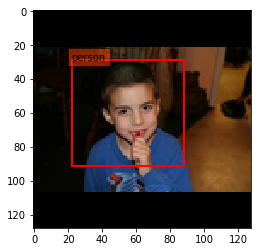

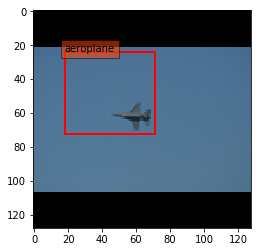

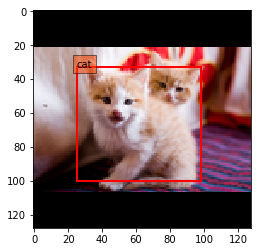

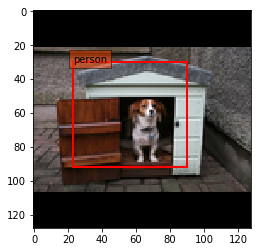

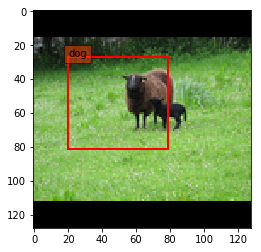

In [11]:
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
%matplotlib inline

root_dir = 'C:/Users/Varun/Desktop/VOCdevkit/VOC2010'
img_dir = os.path.join(root_dir, 'JPEGImages')


def draw_bnd_box(img_arr, p,obj_class) :
    tmp_img_arr = 255 * img_arr
    tmp_img_arr = np.int_(tmp_img_arr)
    tmp_img_arr = np.asarray(tmp_img_arr, dtype = 'uint8')
    im = Image.fromarray(tmp_img_arr, 'RGB')
    
    xmin = p[0]
    ymin = p[1]
    xmax = p[2]
    ymax = p[3]
    
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(im)
    currentAxis = plt.gca()
    
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[0]
    
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, obj_class, bbox={'facecolor':colors[1], 'alpha':0.5})
    
    
    
    #draw = ImageDraw.Draw(im)
    #draw.rectangle([(p[0], p[1]), (p[2], p[3])], outline = 'green')
    #im.show()
    plt.show()
    
def predict_bnd_box(img_filename,obj_class) :
    img_arr, dummy = load_img(img_filename)
    ans = box_model.predict(np.array([img_arr]))
    ans[0] = list(map(int, ans[0]))
    draw_bnd_box(img_arr, ans[0],obj_class)
    
def scale_bnd_box_cord(p, dim) :
    scale_fac = 128 / max(dim[0], dim[1])
    rv = [int(x * scale_fac) for x in p]
    return np.array(rv)

def load_img(img_filename, bnd_box = (0, 0, 0, 0)):
    MAX_X = MAX_Y = 128
    
    tmp_img = Image.open(os.path.join(img_dir, img_filename))
    bnd_box = scale_bnd_box_cord(bnd_box, tmp_img.size)
    tmp_img.thumbnail((128, 128), Image.ANTIALIAS)
    
    img_arr = np.array(tmp_img)
    
    img_x, img_y = img_arr.shape[0], img_arr.shape[1]
    pad_x = (MAX_X - img_x)
    pad_y = (MAX_Y - img_y)
    odd_x = pad_x & 1
    odd_y = pad_y & 1
    pad_x //= 2
    pad_y //= 2
    
    bnd_box[1] += pad_x + odd_x
    bnd_box[3] += pad_x + odd_x
    bnd_box[0] += pad_y + odd_y
    bnd_box[2] += pad_y + odd_y
    
    img_arr = np.pad(img_arr, [(pad_x + odd_x, pad_x), (pad_y + odd_y, pad_y), (0, 0)], mode = 'constant', constant_values = 0)
    
    img_arr.astype('float32')
    img_arr = img_arr / 255.0
    
    return (img_arr, bnd_box)



def predict_class(model, filename) :
    img_arr, dummy = load_img(filename)
    l = [img_arr]
    l = np.array(l)
    ans = model.predict(l)
    return inv_hot[np.argmax(ans)]

def predict_img(filename):
    obj_class = predict_class(classifier_model, os.path.join(img_dir,img_name))
    predict_bnd_box(filename,obj_class)
    
    
    
    

img_list = ['2007_007595.jpg', '2007_000243.jpg', '2007_000876.jpg', '2007_000720.jpg', '2007_005915.jpg']
#print(predict_class(classifier_model, os.path.join(img_dir,img_name)))

#predict_bnd_box(img_name)
for img_name in img_list:
    predict_img(img_name)
    




In [12]:
box_model.save('box_model.h5')
classifier_model.save('classifier_model.h5')